# California Roadkill Analysis
April 2019

-----------------------------------------------------------------------------------------------------------

In case Github Jupyter Notebook rendering is down,  
full project in Jupyter Notebook can be also be viewed here:
https://nbviewer.jupyter.org/github/ommnmm/California_Roadkill_Analysis/blob/master/animal_roadkill_california_analysis.ipynb

## Roadkill
   animals being struck by motor vehicles on roads
   
------------------------------------------------------------------------------------------------------------------  
  
## Impact
Roadkills have wide impact on humankind and wildlife.  

### 1. to human: cost and safety

animal roadkill causes human safety concerns and high cost that concerns governments and insurance agencies.  

### 2. to wildlife: extermination

human activities have exterminated 60% of wildlife in the last 40 years; reasons include over-consumption and diminished habitat,to which animal roadkills contribute. The Federal Highway Administration announced that roadkill is threatening 21 endangered animal species. 

------------------------------------------------------------------------------------------------------------------  



## Goal
 This study uses data from California Roadkill Observations System to estimate:  
1. wildlife removed by roadkills in California,  

2. cost of roadkills to California resident and government,  
as well as making suggestions on public outreach and data collection techniques (mobile app development)
to increase data collection frequency and location accuracy.

------------------------------------------------------------------------------------------------------------------  



## Result 
1. four million roadkills in California per year  
2. roadkill cost ~10 billions for California per year   
3. speed limit doesn't have an effect on the occurence of roadkills  

------------------------------------------------------------------------------------------------------------------  
## Data
~40,000 roadkill entries webscraped from California Roadkill Observations System.  
The data was collected during 2010-2018 by citizen observers.  


## Efforts by California Roadkill Observations System
### 1. roadkill hotspot map & cost estimate:  
    comminucation with California Department of Transportation for building fences in hotspots, 
    where cost of building fences is an order cheaper than deer collision.  

### 2. real time hotspot map:  
    real time warning to drivers at hotspots. This needs much more and better location data to function. Currently
    only 15% of public data contains location information.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

df = pd.read_csv('/Users/superpooh/Desktop/DS/roadkill_send/out.csv')

## data preprocessing: relabeling and cleaning

In [6]:
df.shape

(41700, 7)

In [7]:
## split observation date into year/month columns
df_x=df['Observation Date'].str.split(' ', expand=True)
df_x2 = pd.DataFrame(df_x)
df_x2.drop(2,axis='columns',inplace=True)
df_x2[1].loc[df_x2[1].str.contains('All')] = '-1:-1'
tmp1=df_x2[0].str.split('-',expand=True)
tmp1.columns=['year','month','date']
df_dropobs = df.drop(['Observation Date'],axis=1)
df_final  = pd.concat([df_dropobs,tmp1],axis=1)
df_final.drop(df_final[df_final['year']=='2019'].index,inplace=True) 
df_final['year'] = pd.to_numeric(df_final['year'])
df_final['month'] = pd.to_numeric(df_final['month'])

In [8]:
df = df_final.copy()

In [9]:
df_final.shape

(41372, 9)

In [11]:
df.head(10)

,Unnamed: 0,ID,Category,Species,Species Write-in,Observer,year,month,date
328,328,76735,Mammal (Medium),Virginia Opossum,Opossum,Jim des Lauriers,2018,12,31
329,329,76738,Mammal (Small),Striped Skunk,NaN,Debi Shearwater,2018,12,30
330,330,76968,Bird,Mallard,NaN,Peter Maurer,2018,12,29
331,331,76967,Bird,Barn Owl,NaN,Peter Maurer,2018,12,29
332,332,76966,Bird,Barn Owl,NaN,Peter Maurer,2018,12,29
333,333,76730,Bird,Barn Owl,NaN,Siobhan Ruck,2018,12,29
334,334,76768,Mammal (Small),California Ground Squirrel,NaN,Walter Sakai,2018,12,29
335,335,76723,Mammal (Medium),Gray Fox,NaN,Gary Rotta,2018,12,28
336,336,76965,Mammal (Medium),Raccoon,NaN,Peter Maurer,2018,12,27
337,337,76964,Mammal (Medium),Striped Skunk,NaN,Peter Maurer,2018,12,27


In [12]:
### correct human error on category classification

df.dropna(subset=['Species'],inplace=True)

## regroup all coyote into medium mammal category
df.loc[df['Species'].str.contains('oyot'),'Category'] = 'Mammal (Medium)'

## regroup all deer into large mammal category
df.loc[df['Species'].str.contains('eer'),'Category'] = 'Mammal (Large)'

## regroup all raccoon into medium mammal category
df.loc[df['Species'].str.contains('accoon'),'Category'] = 'Mammal (Medium)'

## regroup all striped skunk into small mammal category (because more were classified as small)

skunk_m=df.loc[df['Species'].str.contains('Striped Skunk')&(df['Category']=='Mammal (Medium)')] 
skunk_s=df.loc[df['Species'].str.contains('Striped Skunk')&(df['Category']=='Mammal (Small)')] 
skunk_s.shape,skunk_m.shape
df.loc[df['Species'].str.contains('Striped Skunk'),'Category'] = 'Mammal (Small)'

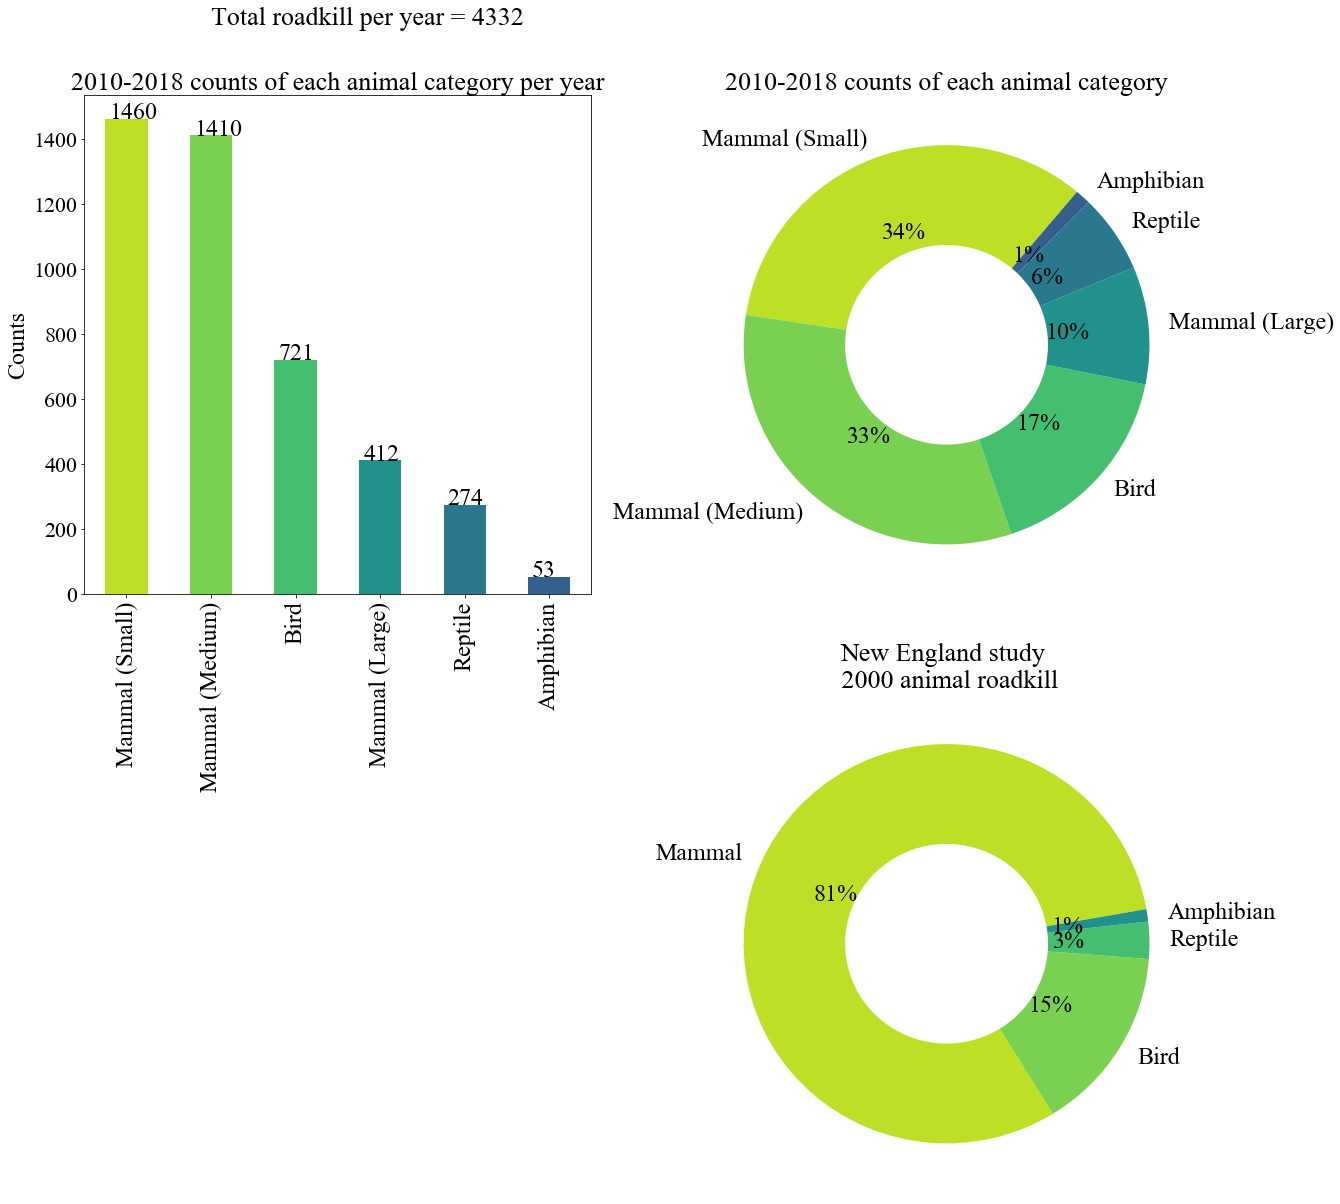

In [14]:
s=df['Category'].value_counts()
s2=s/9.
plt.figure(figsize=(20,20.2))

##counts of each category
plt.subplot(221)
color = cm.viridis([.9,0.8,0.7,0.5,0.4,.3])
s2.plot.bar(color=color)
plt.ylabel('Counts',fontname = "Times New Roman",fontsize=24)
plt.xticks(fontname = "Times New Roman",fontsize=24)  
plt.yticks(fontname = "Times New Roman",fontsize=22)  
plt.title('2010-2018 counts of each animal category per year',fontname = "Times New Roman",fontsize=26)
plt.text(1,1750,'Total roadkill per year = '+str(int(s2.sum())),fontname = "Times New Roman",fontsize=26)

for i in range(0,s2.shape[0]):
    plt.text(i-0.2,s2.values[i],str(int(s2.values[i])),fontname = "Times New Roman",fontsize=24)


##normalized
ax = plt.subplot(222)
size = 0.5
cmap = plt.get_cmap("Vega20_r")
ax.pie(s2, radius=1, colors=color, wedgeprops=dict(width=size),labels=s.index,startangle=50,
       autopct='%1.0f%%',textprops={'fontsize': 24,'fontname' : "Times New Roman"} )
ax.set_title('2010-2018 counts of each animal category',fontname = "Times New Roman",fontsize=26)


# new england study

ax = plt.subplot(224)
size = 0.5
cmap = plt.get_cmap("Vega20_r")
data = {'Category':['Mammal', 'Bird', 'Reptile','Amphibian'], 'Fraction':[0.81,.15,0.03,0.01]} 
eng_93 = pd.DataFrame(data) 
ax.pie(eng_93['Fraction'], radius=1, colors=color, wedgeprops=dict(width=size),labels=eng_93['Category'],startangle=10,
       autopct='%1.0f%%',textprops={'fontsize': 24,'fontname' : "Times New Roman"} )
plt.title('New England study '+'\n'+' 2000 animal roadkill',fontname = "Times New Roman",fontsize=26)




plt.show()


###calculate average per month and extrapolate to true total from CHP data

In [15]:
tmp=df.dropna(subset=['Species'])
tmp2=tmp.dropna(subset=['Category'])
tmp2.shape,tmp.shape
# no missing category if species not null

((38993, 9), (38993, 9))

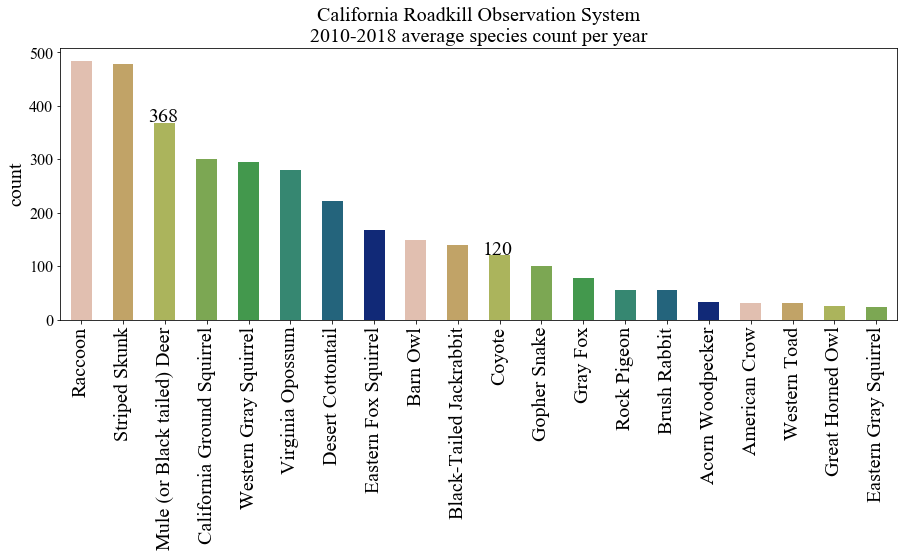

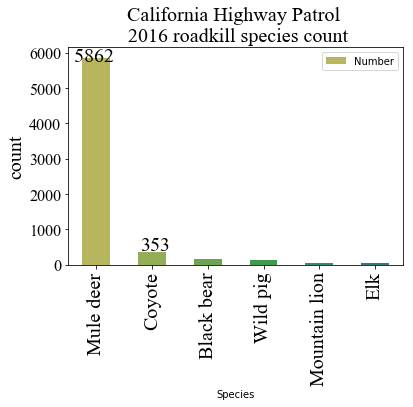

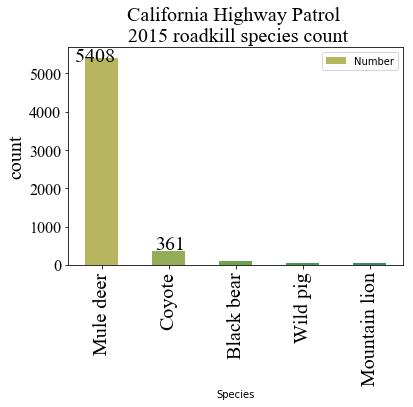

1. sampling percentage
368 deer per year by CROS
~5000 deer per year by CHP: from Donaldson 2008 and Olson 2014 papers and state farm insurance estimate, 
real number is 5-10 folds.
sample size to total roadkill:  368/ (5000*(5-10))  = 0.7 - 1.5 %

2. species coverage
very extensive!!


3. estimate total roadkill per year:

deer roadkill per year
368 deer by CROS —> 5000 deer by CHP —> 25000-50000 deer 
TOTAL:  CROS X (70-140 )

bird roadkill
Bird: 777 x (70 - 140) = 0.05 - 0.1 million in CA.   US total: 60-80 million / year
USA Bird 0.1 million x 50 states = 5 million
other data: top death cause: electric wire (200 m) / windows (100-1000m)  / roadkill (60 m)

total roadkill estimate
deer fraction to all : 5-10% in CA.  total roadkill: (25000 - 50000) x (10-20) = 0.25 - 1 million per year
California all species: CROS 4000 / yr   X   100 = 4 million roadkill / year



In [16]:
tmp=df.dropna(subset=['Species'])
species=tmp['Species']
color = cm.gist_earth(np.linspace(.9,.1, 8))


s3=species.value_counts()
s4=s3[:20]
s5=s4/9.

s7=species.value_counts(normalize=True)
s7=s5[:20]


plt.figure(figsize=(15,5))


s5.plot.bar(color=color)
plt.title('California Roadkill Observation System'+'\n'+'2010-2018 average species count per year',fontname = "Times New Roman",fontsize=20)
plt.ylabel('count',fontname = "Times New Roman",fontsize=20)
plt.xticks(fontname = "Times New Roman",fontsize=20)  
plt.yticks(fontname = "Times New Roman",fontsize=16) 
plt.text(2-0.4,s5.values[2]+1,str(int(s5.values[2])),fontname = "Times New Roman",fontsize=20)
plt.text(10-0.4,s5.values[10]+1,str(int(s5.values[10])),fontname = "Times New Roman",fontsize=20)






#CHP 2016 data
plt.figure(figsize=(10,5))
color = cm.gist_earth(np.linspace(.7,.1, 8))


data = {'Species':['Mule deer', 'Coyote', 'Black bear', 'Wild pig','Mountain lion','Elk'], 'Number':[5862,353,165,145,64,40]} 
df_chp2016 = pd.DataFrame(data) 
df_chp2016.plot.bar(x='Species', y='Number',color=color)
plt.title('California Highway Patrol '+'\n'+' 2016 roadkill species count',fontname = "Times New Roman",fontsize=20)
plt.ylabel('count',fontname = "Times New Roman",fontsize=20)
plt.xticks(fontname = "Times New Roman",fontsize=20)  
plt.yticks(fontname = "Times New Roman",fontsize=16) 
plt.text(0-0.4,df_chp2016.loc[0, 'Number']-100,str(df_chp2016.loc[0, 'Number']),fontname = "Times New Roman",fontsize=20)
plt.text(1-0.2,df_chp2016.loc[1, 'Number']+50,str(df_chp2016.loc[1, 'Number']),fontname = "Times New Roman",fontsize=20)



#CHP 2015 data
plt.figure(figsize=(10,5))
color = cm.gist_earth(np.linspace(.7,.1, 8))


data = {'Species':['Mule deer', 'Coyote', 'Black bear', 'Wild pig','Mountain lion'], 'Number':[5408,361,89,40,37]} 
df_chp2015 = pd.DataFrame(data) 
df_chp2015.plot.bar(x='Species', y='Number',color=color)
plt.title('California Highway Patrol '+'\n'+' 2015 roadkill species count',fontname = "Times New Roman",fontsize=20)
plt.ylabel('count',fontname = "Times New Roman",fontsize=20)
plt.xticks(fontname = "Times New Roman",fontsize=20)  
plt.yticks(fontname = "Times New Roman",fontsize=16) 
plt.text(0-0.4,df_chp2015.loc[0, 'Number']-100,str(df_chp2015.loc[0, 'Number']),fontname = "Times New Roman",fontsize=20)
plt.text(1-0.2,df_chp2015.loc[1, 'Number']+50,str(df_chp2015.loc[1, 'Number']),fontname = "Times New Roman",fontsize=20)







plt.show()


print('1. sampling percentage'+'\n'+'368 deer per year by CROS'+'\n'
      +'~5000 deer per year by CHP: from Donaldson 2008 and Olson 2014 papers and state farm insurance estimate, '+'\n'
      +'real number is 5-10 folds.'+'\n'
      +'sample size to total roadkill:  368/ (5000*(5-10))  = 0.7 - 1.5 %'+'\n'
      +'\n'
      +'2. species coverage'+'\n'
      +'very extensive!!'+'\n'+'\n')




print ('3. estimate total roadkill per year:'+'\n'

+'\n'
'deer roadkill per year'+'\n'
'368 deer by CROS —> 5000 deer by CHP —> 25000-50000 deer '+'\n'
       'TOTAL:  CROS X (70-140 )'+'\n'
+'\n'
       
'bird roadkill' +'\n'


'Bird: 777 x (70 - 140) = 0.05 - 0.1 million in CA.   US total: 60-80 million / year' +'\n'
'USA Bird 0.1 million x 50 states = 5 million'+'\n'
'other data: top death cause: electric wire (200 m) / windows (100-1000m)  / roadkill (60 m)'+'\n'+'\n'
'total roadkill estimate'+'\n'
'deer fraction to all : 5-10% in CA.  total roadkill: (25000 - 50000) x (10-20) = 0.25 - 1 million per year' +'\n'
'California all species: CROS 4000 / yr   X   100 = 4 million roadkill / year' +'\n')




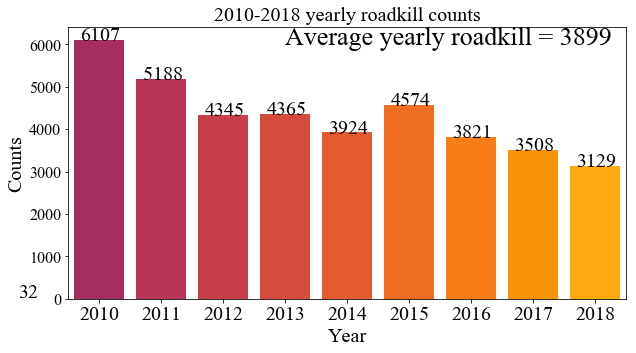

In [17]:
## investigate yearly traffic during 2010-2018
plt.figure(figsize=(10,5))

##can't be centered on axis label, so turn to bar plot
arr = np.array(df['year'])
labels, counts = np.unique(arr, return_counts=True)
color = cm.inferno_r(np.linspace(.6,.1, 12))
plt.bar(labels, counts, align='center',color=color)
plt.gca().set_xticks(labels)
plt.xticks(fontname = "Times New Roman",fontsize=20)  
plt.yticks(fontname = "Times New Roman",fontsize=16)  
plt.xlabel('Year',fontname = "Times New Roman",fontsize=20)
plt.ylabel('Counts',fontname = "Times New Roman",fontsize=20)
plt.xlim(2009.5,2018.5)

plt.title('2010-2018 yearly roadkill counts',fontname = "Times New Roman",fontsize=20)

for i in range(0,len(labels)):
    plt.text(labels[i]-0.3,counts[i]-20,str(counts[i]),fontname = "Times New Roman",fontsize=20)

plt.text(2013,6000,'Average yearly roadkill = '+ str(int(counts.mean())),fontname = "Times New Roman",fontsize=26)

plt.show()



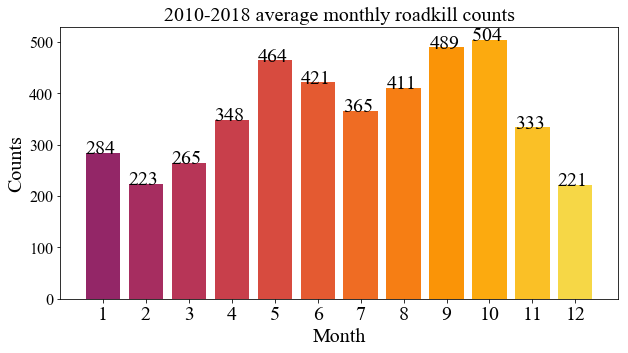

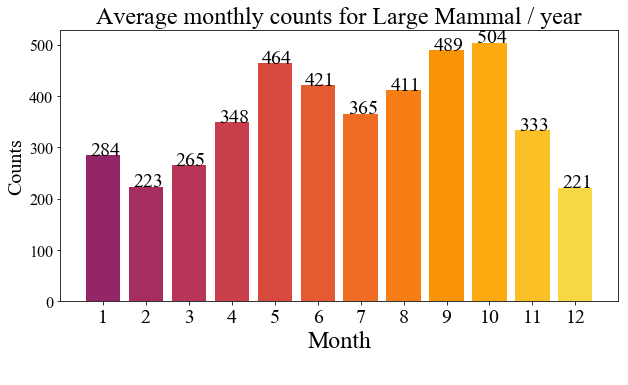

In [18]:
## investigate monthly traffic during 2010-2018
plt.figure(figsize=(10,5))

##can't be centered on axis label, so turn to bar plot
arr = np.array(df['month'])
labels, counts = np.unique(arr, return_counts=True)
labels = list(map(int, labels)) 
color = cm.inferno_r(np.linspace(.6,.1, 12))
plt.bar(labels, counts/9., align='center',color=color)
plt.gca().set_xticks(labels)
plt.xticks(fontname = "Times New Roman",fontsize=20)  
plt.yticks(fontname = "Times New Roman",fontsize=16)  
plt.xlabel('Month',fontname = "Times New Roman",fontsize=20)
plt.ylabel('Counts',fontname = "Times New Roman",fontsize=20)
plt.xlim(0,13)


plt.title('2010-2018 average monthly roadkill counts',fontname = "Times New Roman",fontsize=20)



for i in range(0,len(labels)):
  plt.text(labels[i]-0.4,counts[i]/9.-2,str(int(counts[i]/9.)),fontname = "Times New Roman",fontsize=20)




plt.figure(figsize=(10,5))

color = cm.inferno_r(np.linspace(.6,.1, 12))
arr = np.array(df['month'])
plt.xlim(0,13)
labels, counts = np.unique(arr, return_counts=True)
labels = list(map(int, labels)) 
plt.bar(labels, counts/9., align='center',color=color)
plt.gca().set_xticks(labels)
plt.xlabel('Month'+'\n',fontname = "Times New Roman",fontsize=24)
plt.ylabel('Counts',fontname = "Times New Roman",fontsize=20)
plt.xticks(fontname = "Times New Roman",fontsize=20)  
plt.yticks(fontname = "Times New Roman",fontsize=16) 
plt.title('Average monthly counts for Large Mammal / year',fontname = "Times New Roman",fontsize=24)
for i in range(0,len(labels)):
  plt.text(labels[i]-0.3,counts[i]/9.,str(int(counts[i]/9.)),fontname = "Times New Roman",fontsize=20)





plt.show()

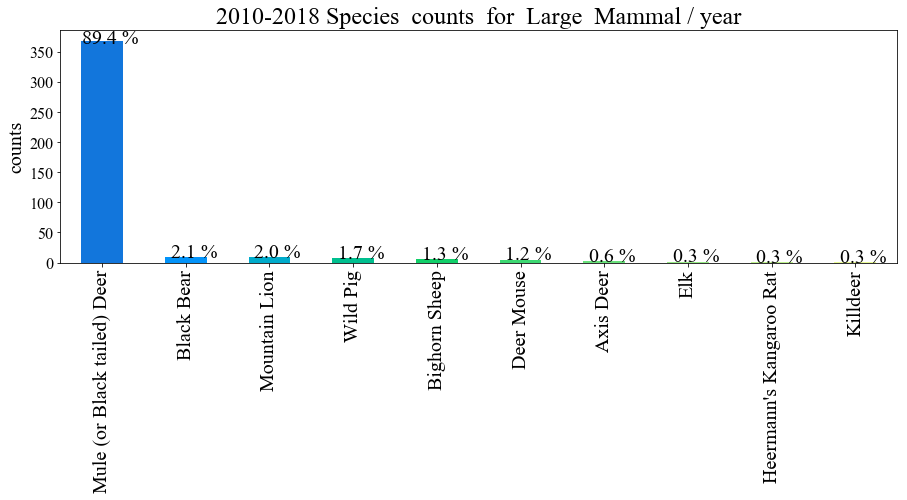

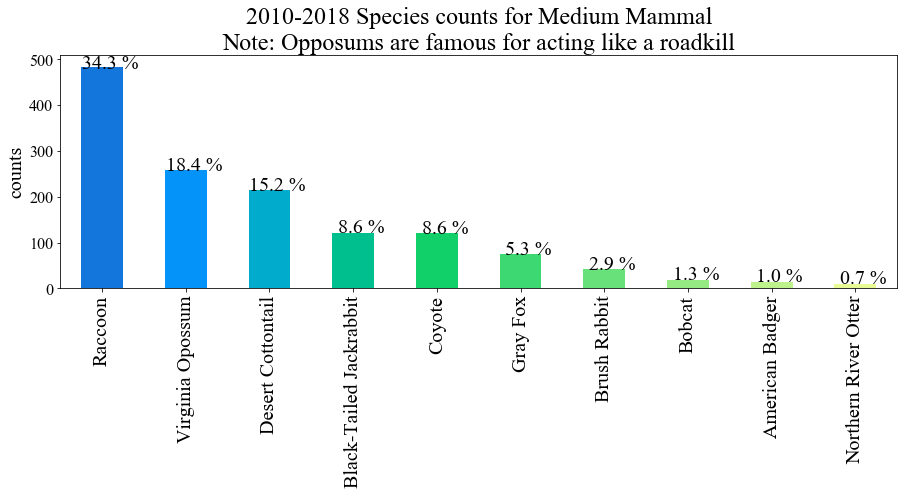

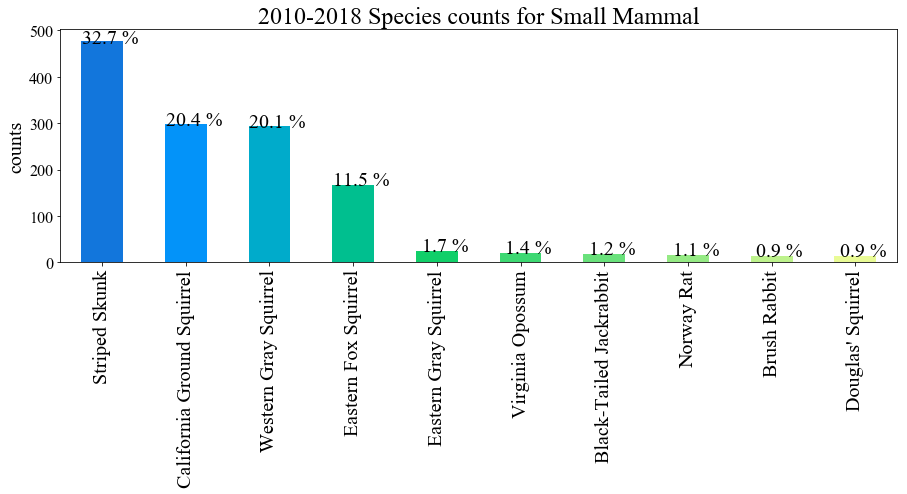

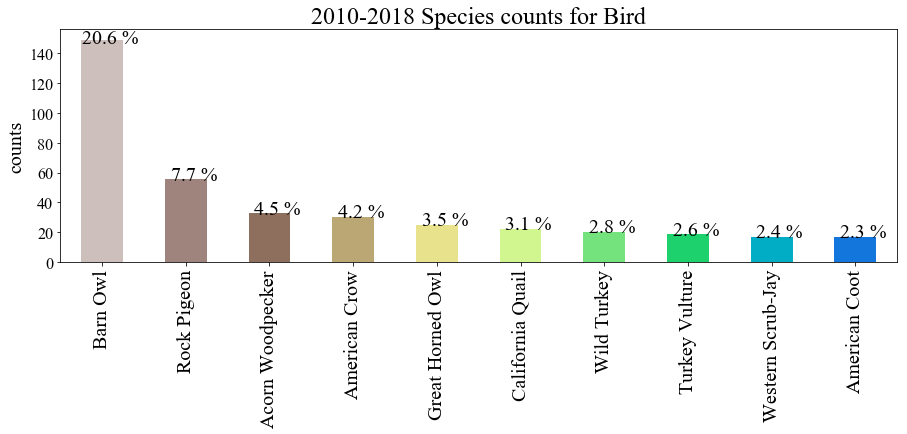

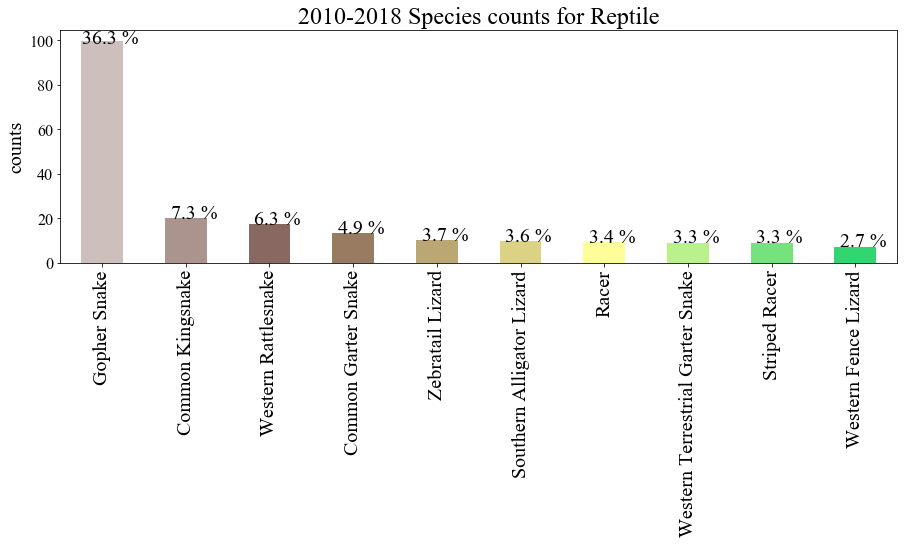

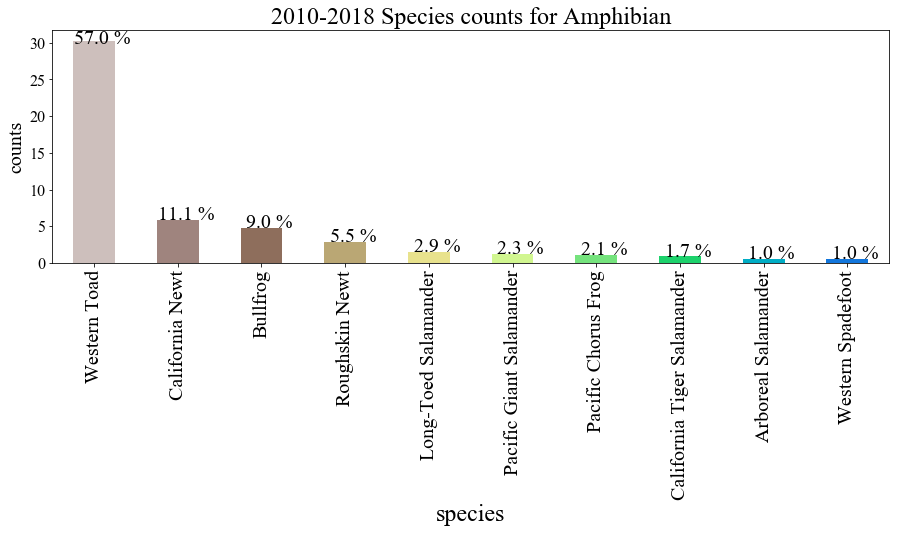

In [32]:
# plot bar chart (in percentage) of species in large mammel


ml=df.loc[df['Category']=='Mammal (Large)']
ml.dropna(subset=['Species'],inplace=True)

plt.figure(figsize=(15,30))
plt.subplot(611)
s2=ml['Species']
s4=s2.value_counts(normalize=True)
s5=s4[:10]
s7=s5.round(decimals=3)
s6=s2.value_counts()
s8=s6[:10]
s3=s8/9.
color = cm.terrain(np.linspace(.1,.9, 20))
plt.ylabel('counts',fontname = "Times New Roman",fontsize=20)
plt.xticks(fontname = "Times New Roman",fontsize=20)  
plt.yticks(fontname = "Times New Roman",fontsize=16) 
plt.title('2010-2018 Species  counts  for  Large  Mammal / year',fontname = "Times New Roman",fontsize=24)
s3.plot.bar(color=color)
for i in range(0,s3.shape[0]):
    plt.text(i-0.6,s3.values[i]-(s3.values[i]/100.0),str("{:10.1f}".format(s7.values[i]*100))+' %',fontname = "Times New Roman",fontsize=20)

## plot bar chart (in percentage) of species in medium mammel



s=df.loc[df['Category']=='Mammal (Medium)']
s.dropna(subset=['Species'],inplace=True)
s2=s['Species']
s4=s2.value_counts(normalize=True)
s5=s4[:10]
s7=s5.round(decimals=3)
s6=s2.value_counts()
s8=s6[:10]
s3=s8/9.


plt.figure(figsize=(15,30))
plt.subplot(612)



color = cm.terrain(np.linspace(.1,.9, 20))
plt.ylabel('counts',fontname = "Times New Roman",fontsize=20)
plt.xticks(fontname = "Times New Roman",fontsize=20)  
plt.yticks(fontname = "Times New Roman",fontsize=16) 
plt.title('2010-2018 Species counts for Medium Mammal\nNote: Opposums are famous for acting like a roadkill',fontname = "Times New Roman",fontsize=24)


s3.plot.bar(color=color)
for i in range(0,s3.shape[0]):
    plt.text(i-0.6,s3.values[i]-(s3.values[i]/100.0),str("{:10.1f}".format(s7.values[i]*100))+' %',fontname = "Times New Roman",fontsize=20)



## plot bar chart (in percentage) of species in small mammel
s=df.loc[df['Category']=='Mammal (Small)']
s.dropna(subset=['Species'],inplace=True)
s2=s['Species']
s4=s2.value_counts(normalize=True)
s4=s2.value_counts(normalize=True)
s5=s4[:10]
s7=s5.round(decimals=3)
s6=s2.value_counts()
s8=s6[:10]
s3=s8/9.


plt.figure(figsize=(15,30))
plt.subplot(613)


color = cm.terrain(np.linspace(.1,.9, 20))
plt.ylabel('counts',fontname = "Times New Roman",fontsize=20)
plt.xticks(fontname = "Times New Roman",fontsize=20)  
plt.yticks(fontname = "Times New Roman",fontsize=16)  
plt.title('2010-2018 Species counts for Small Mammal',fontname = "Times New Roman",fontsize=24)
s3.plot.bar(color=color)
for i in range(0,s3.shape[0]):
    plt.text(i-0.6,s3.values[i]-(s3.values[i]/100.0),str("{:10.1f}".format(s7.values[i]*100))+' %',fontname = "Times New Roman",fontsize=20)









## plot bar chart (in percentage) of species in bird
s=df.loc[df['Category']=='Bird']
s.dropna(subset=['Species'],inplace=True)
#print(s)
s2=s['Species']
s4=s2.value_counts()
s4=s2.value_counts(normalize=True)
s5=s4[:10]
s7=s5.round(decimals=3)
s6=s2.value_counts()
s8=s6[:10]
s3=s8/9.


plt.figure(figsize=(15,30))
plt.subplot(614)
color = cm.terrain(np.linspace(.9,.1, 10))
plt.ylabel('counts',fontname = "Times New Roman",fontsize=20)
plt.xticks(fontname = "Times New Roman",fontsize=20)  
plt.yticks(fontname = "Times New Roman",fontsize=16)  
plt.title('2010-2018 Species counts for Bird',fontname = "Times New Roman",fontsize=24)
s3.plot.bar(color=color)
for i in range(0,s3.shape[0]):
    plt.text(i-0.6,s3.values[i]-(s3.values[i]/100.0),str("{:10.1f}".format(s7.values[i]*100))+' %',fontname = "Times New Roman",fontsize=20)



## plot bar chart (in percentage) of species in reptile
s=df.loc[df['Category']=='Reptile']
s.dropna(subset=['Species'],inplace=True)

s2=s['Species']
s4=s2.value_counts(normalize=True)
s5=s4[:10]
s7=s5.round(decimals=3)
s6=s2.value_counts()
s8=s6[:10]
s3=s8/9.



plt.figure(figsize=(15,30))
plt.subplot(615)
color = cm.terrain(np.linspace(.9,.1, 13))
plt.ylabel('counts',fontname = "Times New Roman",fontsize=20)
plt.xticks(fontname = "Times New Roman",fontsize=20)  
plt.yticks(fontname = "Times New Roman",fontsize=16) 
plt.title('2010-2018 Species counts for Reptile',fontname = "Times New Roman",fontsize=24)
s3.plot.bar(color=color)
for i in range(0,s3.shape[0]):
    plt.text(i-0.6,s3.values[i]-(s3.values[i]/100.0),str("{:10.1f}".format(s7.values[i]*100))+' %',fontname = "Times New Roman",fontsize=20)



## plot bar chart (in percentage) of species in Amphibian
s=df.loc[df['Category']=='Amphibian']
s.dropna(subset=['Species'],inplace=True)
s2=s['Species']
s4=s2.value_counts(normalize=True)
s5=s4[:10]
s7=s5.round(decimals=3)
s6=s2.value_counts()
s8=s6[:10]
s3=s8/9.



plt.figure(figsize=(15,30))
plt.subplot(616)
color = cm.terrain(np.linspace(.9,.1, 10))
plt.xlabel('species',fontname = "Times New Roman",fontsize=24)
plt.ylabel('counts',fontname = "Times New Roman",fontsize=20)
plt.xticks(fontname = "Times New Roman",fontsize=20)  
plt.yticks(fontname = "Times New Roman",fontsize=16) 
plt.title('2010-2018 Species counts for Amphibian',fontname = "Times New Roman",fontsize=24)

s3.plot.bar(color=color)
for i in range(0,s3.shape[0]):
    plt.text(i-0.6,s3.values[i]-(s3.values[i]/100.0),str("{:10.1f}".format(s7.values[i]*100))+' %',fontname = "Times New Roman",fontsize=20)



plt.show()


In [40]:
# investigate potential observer bias for Large Mammal
s=df.loc[df['Category']=='Mammal (Large)']
s2=s['Observer'].value_counts(normalize=True)
s3=s2.loc[s2 > 0.01]
s3.head(10)
print('fraction of large mammal observations made by top observers:','\n','\n',s3[:10],'\n','\n','conclusion: no super dominant observers, so there\'s likely not much observer bias')

fraction of large mammal observations made by top observers: 
 
 Peter Maurer          0.073355
Anonymous             0.071197
George Chaniot        0.070119
Terri Weist           0.060140
Michael I Christie    0.048813
Fraser Shilling       0.036947
Douglas Long          0.031014
S Hugdahl             0.029666
Gary Rotta            0.028317
Mary Gausen           0.025620
Name: Observer, dtype: float64 
 
 conclusion: no super dominant observers, so there's likely not much observer bias


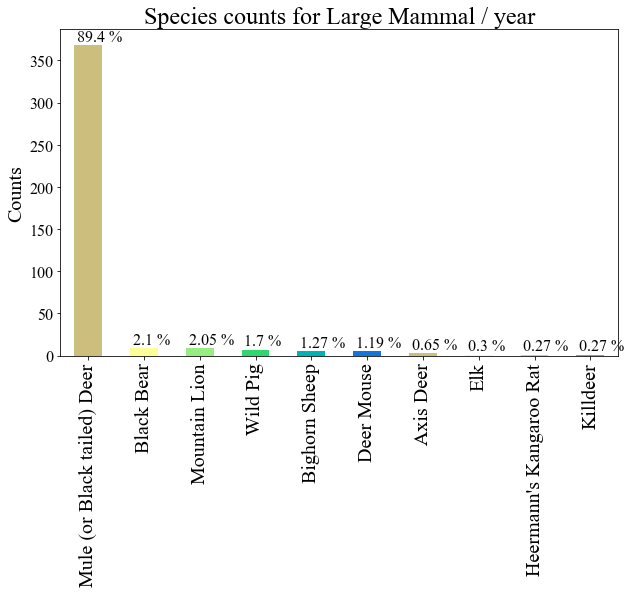

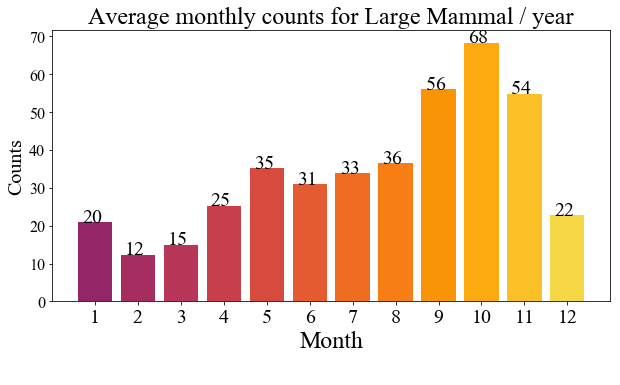

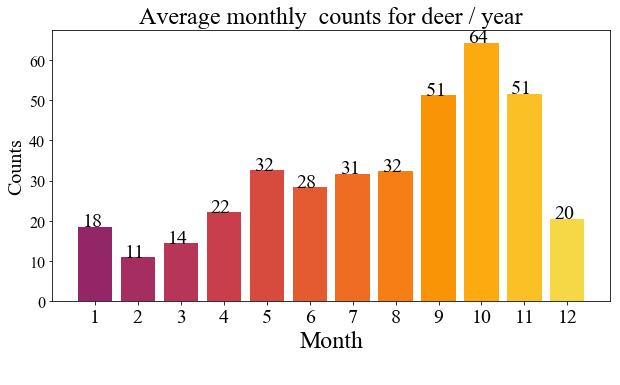

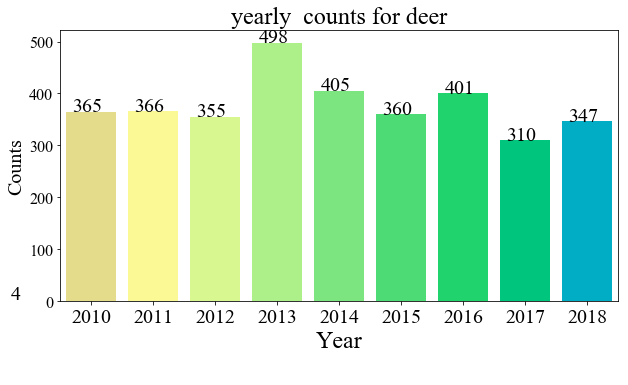

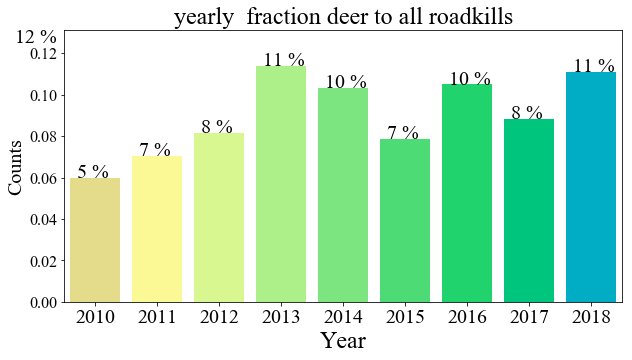

In [22]:
### DEER AND LARGE MAMMAL


# plot bar chart (in percentage) of species in large mammel

ml=df.loc[df['Category']=='Mammal (Large)']
ml.dropna(subset=['Species'],inplace=True)

plt.figure(figsize=(10,6))

s2=ml['Species']
s4=s2.value_counts()/9.
sum_ml=s4.sum()
s3=s4[:10]
color = cm.terrain(np.linspace(.6,.1, 6))
plt.ylabel('Counts',fontname = "Times New Roman",fontsize=20)
plt.xticks(fontname = "Times New Roman",fontsize=20)  
plt.yticks(fontname = "Times New Roman",fontsize=16) 
plt.title('Species counts for Large Mammal / year',fontname = "Times New Roman",fontsize=24)
s3.plot.bar(color=color)
for i in range(0,s3.shape[0]):
    plt.text(i-0.2,s3.values[i]+5,str((s3.values[i]/sum_ml*100).round(decimals=2))
           +' %',fontname = "Times New Roman",fontsize=16)



#monthly counts for large mammal

plt.figure(figsize=(10,5))

color = cm.inferno_r(np.linspace(.6,.1, 12))
arr = np.array(ml['month'])
plt.xlim(0,13)
labels, counts = np.unique(arr, return_counts=True)
plt.bar(labels, counts/9., align='center',color=color)
plt.gca().set_xticks(labels)
plt.xlabel('Month'+'\n',fontname = "Times New Roman",fontsize=24)
plt.ylabel('Counts',fontname = "Times New Roman",fontsize=20)
plt.xticks(fontname = "Times New Roman",fontsize=20)  
plt.yticks(fontname = "Times New Roman",fontsize=16) 
plt.title('Average monthly counts for Large Mammal / year',fontname = "Times New Roman",fontsize=24)
for i in range(0,len(labels)):
    plt.text(labels[i]-0.3,counts[i]/9.,str(int(counts[i]/9.)),fontname = "Times New Roman",fontsize=20)





## which months are there more deer roadkills
plt.figure(figsize=(10,5))


color = cm.inferno_r(np.linspace(.6,.1, 12))
s=df.dropna(subset=['Species'])
deer1=s.loc[s['Species'].str.contains('eer')]
arr = np.array(deer1['month'])
plt.xlim(0,13)
labels, counts = np.unique(arr, return_counts=True)
plt.bar(labels, counts/9., align='center',color=color)
plt.xlabel('Month'+'\n',fontname = "Times New Roman",fontsize=24)
plt.ylabel('Counts',fontname = "Times New Roman",fontsize=20)
plt.xticks(fontname = "Times New Roman",fontsize=20)  
plt.yticks(fontname = "Times New Roman",fontsize=16) 
plt.title('Average monthly  counts for deer / year',fontname = "Times New Roman",fontsize=24)
plt.gca().set_xticks(labels)
for i in range(0,len(labels)):
    plt.text(labels[i]-0.3,counts[i]/9.,str(int(counts[i]/9.)),fontname = "Times New Roman",fontsize=20)




#yearly counts for deer
plt.figure(figsize=(10,5))

color = cm.terrain(np.linspace(.6,.1, 12))
s=df.dropna(subset=['Species'])
deer1=s.loc[s['Species'].str.contains('eer')]
arr = np.array(deer1['year'])
labels, counts = np.unique(arr, return_counts=True)
plt.bar(labels, counts, align='center',color=color)
plt.xlabel('Year'+'\n',fontname = "Times New Roman",fontsize=24)
plt.ylabel('Counts',fontname = "Times New Roman",fontsize=20)
plt.xticks(fontname = "Times New Roman",fontsize=20)  
plt.yticks(fontname = "Times New Roman",fontsize=16) 
plt.title('yearly  counts for deer',fontname = "Times New Roman",fontsize=24)
plt.gca().set_xticks(labels)
plt.xlim(2009.5,2018.5)

for i in range(0,len(labels)):
    plt.text(labels[i]-0.3,counts[i],str(counts[i]),fontname = "Times New Roman",fontsize=20)




#yearly fraction of deer to total
plt.figure(figsize=(10,5))

color = cm.terrain(np.linspace(.6,.1, 12))
s=df.dropna(subset=['Species'])
deer1=s.loc[s['Species'].str.contains('eer')]
arr_deer = np.array(deer1['year'])
arr_all = np.array(s['year'])
labels, counts_deer = np.unique(arr_deer, return_counts=True)
labels, counts_all = np.unique(arr_all, return_counts=True)


plt.bar(labels, counts_deer/counts_all, align='center',color=color)
plt.xlabel('Year',fontname = "Times New Roman",fontsize=24)
plt.ylabel('Counts',fontname = "Times New Roman",fontsize=20)
plt.xticks(fontname = "Times New Roman",fontsize=20)  
plt.yticks(fontname = "Times New Roman",fontsize=16) 
plt.title('yearly  fraction deer to all roadkills',fontname = "Times New Roman",fontsize=24)
plt.gca().set_xticks(labels)
plt.xlim(2009.5,2018.5)

for i in range(0,len(labels)):
    plt.text(labels[i]-0.3,counts_deer[i]/counts_all[i],str(int(counts_deer[i]/counts_all[i]*100.))
           +' %',fontname = "Times New Roman",fontsize=20)









plt.show()


In [23]:
### OBSERVER BIAS ?  (2018 CHRISTIE OBSERVATIONS)


# investigate potential observer bias for Large Mammal
s=df.loc[df['Category']=='Mammal (Large)']
s2=s['Observer'].value_counts(normalize=True)
s3=s2.loc[s2 > 0.01]
s3.head(10)
print('large mammal observer    observing fraction','\n','\n',s3.head(10),'\n','\n','conclusion: likely not much observer bias for large mammals')

large mammal observer    observing fraction 
 
 Peter Maurer          0.073355
Anonymous             0.071197
George Chaniot        0.070119
Terri Weist           0.060140
Michael I Christie    0.048813
Fraser Shilling       0.036947
Douglas Long          0.031014
S Hugdahl             0.029666
Gary Rotta            0.028317
Mary Gausen           0.025620
Name: Observer, dtype: float64 
 
 conclusion: likely not much observer bias for large mammals


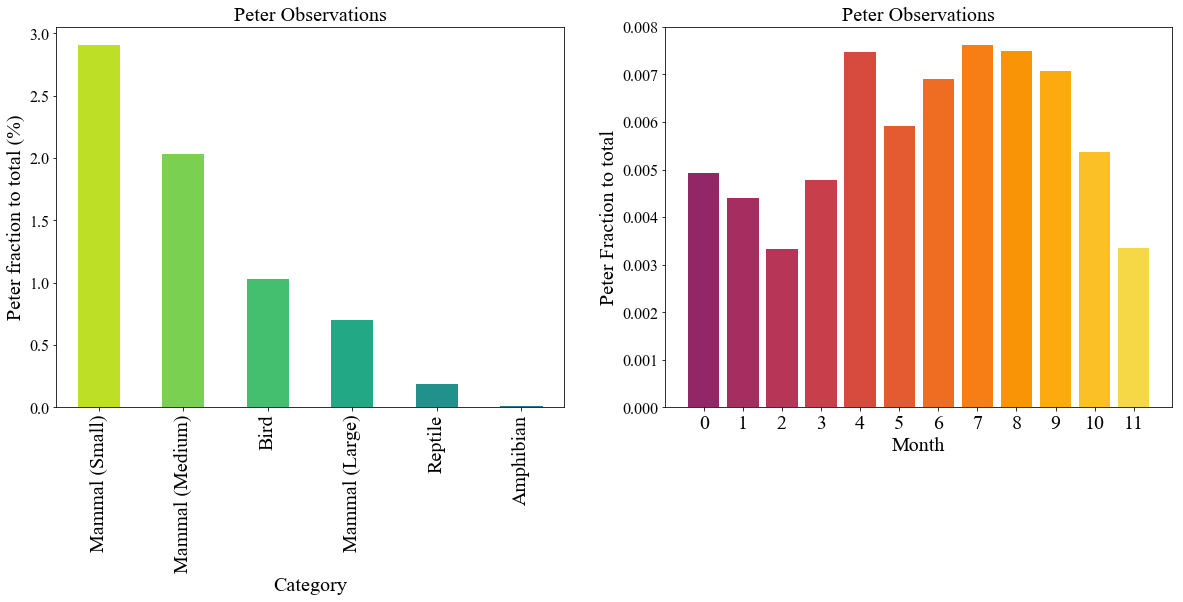

In [24]:
#investigate effect of 1st dominant observer  - category

ch=df.loc[df['Observer']=='Peter Maurer']
ch2=ch['Category'].value_counts()
color = cm.viridis(np.linspace(.9,.4, 6))
plt.figure(figsize=(20,7))

s3=ch2.div(df.shape[0])*100.
plt.subplot(121)
s3.plot.bar(color=color)
plt.xticks(fontname = "Times New Roman",fontsize=20)  
plt.yticks(fontname = "Times New Roman",fontsize=16)  
plt.xlabel('Category',fontname = "Times New Roman",fontsize=20)
plt.ylabel('Peter fraction to total (%)',fontname = "Times New Roman",fontsize=20)
plt.title('Peter Observations',fontname = "Times New Roman",fontsize=20)


#investigate effect of 1st dominant observer  - month
ch=df.loc[df['Observer']=='Peter Maurer']

month=pd.to_numeric(ch['month'])


ch3=ch['month'].value_counts()

##chrsitie monthly observations
ch5=ch3.sort_index(ascending=True)
##fraction of christie monthly observations to total

ch_month=ch5.div(df.shape[0])
labels=np.array([i for i in range(0,12)])
color = cm.inferno_r(np.linspace(.6,.1, 12))
plt.subplot(122)
plt.xlabel('Month',fontname = "Times New Roman",fontsize=20)
plt.ylabel('Peter Fraction to total',fontname = "Times New Roman", fontsize=20)
plt.xticks(fontname = "Times New Roman",fontsize=20)  
plt.yticks(fontname = "Times New Roman",fontsize=16)  
plt.gca().set_xticks(labels)
plt.bar(labels,ch_month,color=color)
plt.title('Peter Observations',fontname = "Times New Roman",fontsize=20)


plt.show()


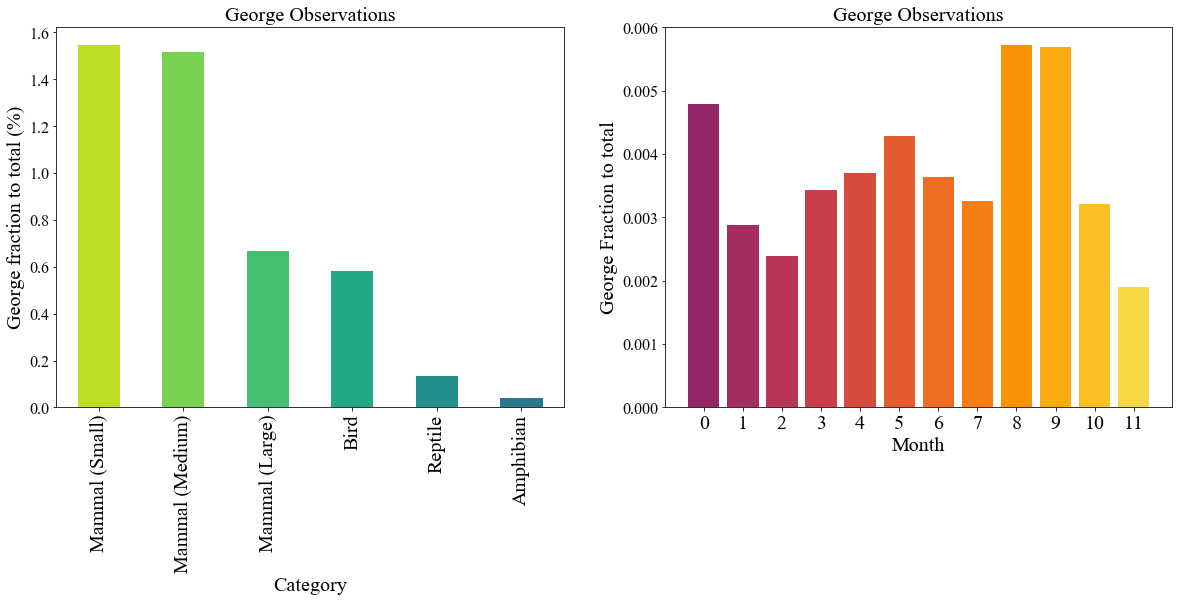

In [25]:
#investigate effect of 2nd dominant observer  - category
ch=df.loc[df['Observer']=='George Chaniot']
ch2=ch['Category'].value_counts()
color = cm.viridis(np.linspace(.9,.4, 6))
plt.figure(figsize=(20,7))

s3=ch2.div(df.shape[0])*100.
plt.subplot(121)
s3.plot.bar(color=color)
plt.xticks(fontname = "Times New Roman",fontsize=20)  
plt.yticks(fontname = "Times New Roman",fontsize=16)  
plt.xlabel('Category',fontname = "Times New Roman",fontsize=20)
plt.ylabel('George fraction to total (%)',fontname = "Times New Roman",fontsize=20)
plt.title('George Observations',fontname = "Times New Roman",fontsize=20)


#investigate effect of 1st dominant observer  - month
ch=df.loc[df['Observer']=='George Chaniot']

month=pd.to_numeric(ch['month'])


ch3=ch['month'].value_counts()

##chrsitie monthly observations
ch5=ch3.sort_index(ascending=True)
##fraction of christie monthly observations to total

ch_month=ch5.div(df.shape[0])
labels=np.array([i for i in range(0,12)])
color = cm.inferno_r(np.linspace(.6,.1, 12))
plt.subplot(122)
plt.xlabel('Month',fontname = "Times New Roman",fontsize=20)
plt.ylabel('George Fraction to total',fontname = "Times New Roman", fontsize=20)
plt.xticks(fontname = "Times New Roman",fontsize=20)  
plt.yticks(fontname = "Times New Roman",fontsize=16)  
plt.gca().set_xticks(labels)
plt.bar(labels,ch_month,color=color)
plt.title('George Observations',fontname = "Times New Roman",fontsize=20)


plt.show()



In [26]:
##list roadkill mammal species

## check against california endangered species
## no endangered species found
mammal=df.loc[df['Category'].str.contains('ammal')]
tmp=mammal.dropna(subset=['Category'])
species=tmp['Species']
s3=species.value_counts()
print('list roadkill mammal species','\n','conclusion: no endangered species found','\n','\n',s3.index.tolist())

list roadkill mammal species 
 no endangered species found 
 
 ['Raccoon', 'Striped Skunk', 'Mule (or Black tailed) Deer', 'California Ground Squirrel', 'Western Gray Squirrel', 'Virginia Opossum', 'Desert Cottontail', 'Eastern Fox Squirrel', 'Black-Tailed Jackrabbit', 'Coyote', 'Gray Fox', 'Brush Rabbit', 'Eastern Gray Squirrel', 'Bobcat', 'Norway Rat', 'American Badger', "Douglas' Squirrel", 'Long-Tailed Weasel', 'White-Tailed Antelope Squirrel', 'Northern River Otter', 'Red Fox', 'Black Rat', 'White-Tailed Jackrabbit', 'Black Bear', 'Mountain Lion', 'California Vole', "Botta's Pocket Gopher", 'Wild Pig', 'Western Spotted Skunk', 'American Mink', 'Desert Woodrat', 'Bighorn Sheep', 'Deer Mouse', 'Chisel-Toothed Kangaroo Rat', 'Kit Fox', 'Dusky-Footed Woodrat', 'Common Porcupine', 'Ringtail', 'Mountain Cottontail', 'American Beaver', 'Island Gray Fox', "Belding's Ground Squirrel", 'Golden-Mantled Ground Squirrel', 'Axis Deer', 'Desert Kangaroo Rat', 'Broad-Footed Mole', 'Dulzura Kangar

Conclusion: </br>
The data doesn't demonstrate immediate threat of roadkill to endangered species in California,since no endangered species was found in roadkill data.